In [15]:
using Distributions, Random, Plots

In [1]:
function test(x)
    return (1/10) * sum(exp(-x[i])/(1 + x[i+1]^2) for i in 1:(length(x)-1))
end

test (generic function with 1 method)

In [10]:
N = 5000
m = 250
xtrain = rand(Uniform(-1,1),(m,10))
ytrain = eachrow(xtrain) .|> test
xtest = rand(Uniform(-1,1),(m,10))
ytest = eachrow(xtest) .|> test

250-element Vector{Float64}:
 0.7743825101426286
 0.6862067720101098
 0.9164174135109591
 0.9803888065064298
 0.6226752973587564
 0.9748677276111162
 1.0885893292917723
 0.934719090660008
 0.8091364999551035
 0.8686677927756075
 ⋮
 0.6734680706338202
 0.7399298241511468
 0.9667426966702432
 0.8838545067631585
 0.7451652997071307
 0.9553849448289518
 0.9418891443052356
 0.9470727682896837
 0.9996063756977422

In [11]:
include("src/qsrfe.jl")

Main.qsrfe

In [23]:
#test cell for hyperparameter testing
#model = model
N= N
λ = 0.00005#srfe
#λ = 0.00004
model = qsrfe.srfeRegressor(N=N,λ=λ, σ2=1.0,intercept=true)

c = qsrfe.fit(model,xtrain,ytrain;verbose=true)
ytrainpred = qsrfe.predict(model,xtrain)
ytestpred = qsrfe.predict(model,xtest);

println("")
println("rel L2: ",qsrfe.rel_L2_error(ytest,ytestpred)," train rel: ",qsrfe.rel_L2_error(ytrain,ytrainpred))
println("abs: ",qsrfe.abs_error(ytest,ytestpred)," train abs: ",qsrfe.abs_error(ytrain,ytrainpred))
println("mse: ",qsrfe.mse(ytest,ytestpred)," train mse: ",qsrfe.mse(ytrain,ytrainpred))
println("rel mse: ",qsrfe.rel_mse(ytest,ytestpred)," rel train mse: ",qsrfe.rel_mse(ytrain,ytrainpred))

support: 702/5001
rel L2: 0.06050307025207311 train rel: 0.0010147076595418978
abs: 0.03981650490834506 train abs: 0.0006702256311646899
mse: 0.0026206624071909595 train mse: 7.298460009520552e-7
rel mse: 0.06050307025207311 rel train mse: 0.0010147076595418978


In [24]:
log10(250)

2.3979400086720375

In [28]:
log10(0.00262)

-2.5816987086802548

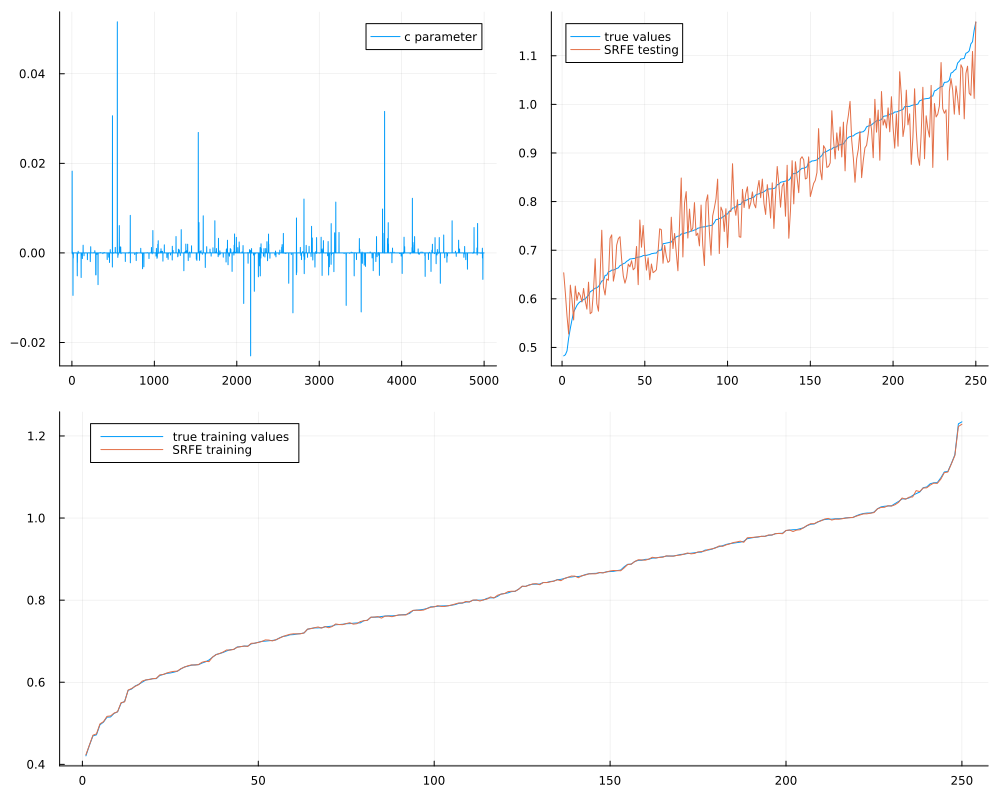

In [16]:
p1 = plot(c[1:(end - model.intercept)],label="c parameter")
p2 = plot(ytrain[sortperm(ytrain)], label="true training values")
plot!(ytrainpred[sortperm(ytrain)], label="SRFE training")
p3 = plot(ytest[sortperm(ytest)], label="true values")
plot!(ytestpred[sortperm(ytest)], label="SRFE testing")
p4 = plot(p1,p3,layout=2, size = (1000,400))
plot(p4,p2,layout=(2,1) ,size=(1000,800))

In [81]:
using HyperTuning
function objective(trial)
    @unpack λ, σ2 = trial
    model = qsrfe.rfeRegressor(N=2^13,λ=λ, σ2=σ2,intercept=true)
    c = qsrfe.fit(model,xtrain,ytrain;verbose=false)
    ytestpred = qsrfe.predict(model,xtest)
    return qsrfe.mse(ytest,ytestpred)
end

scenario = Scenario(λ = (0.000001..0.9),
                        σ2 = (1.0..100.0),
                        max_trials = 60 );

HyperTuning.optimize(objective, scenario)

Scenario: evaluated 60 trials.
          parameters: λ, σ2
   space cardinality: Huge!
           instances: 1
          batch_size: 32
             sampler: BCAPSampler{Random.Xoshiro}
              pruner: NeverPrune
          max_trials: 60
           max_evals: 60
         stop_reason: HyperTuning.BudgetExceeded("Due to max_trials")
          best_trial: 
┌───────────┬──────────┐
│     Trial │    Value │
│        37 │          │
├───────────┼──────────┤
│         λ │ 0.661512 │
│        σ2 │      1.0 │
│    Pruned │    false │
│   Success │    false │
│ Objective │ 0.658043 │
└───────────┴──────────┘


In [82]:
using HyperTuning
function objective(trial)
    @unpack λ, σ2 = trial
    model = qsrfe.rfeRegressor(N=2^13,λ=λ, σ2=σ2,intercept=true)
    c = qsrfe.fit(model,xtrain,ytrain;verbose=false)
    ytestpred = qsrfe.predict(model,xtest)
    return qsrfe.mse(ytest,ytestpred)
end

scenario = Scenario(λ = (0.001..1.9),
                        σ2 = (0.01..5.0),
                        max_trials = 60 );

HyperTuning.optimize(objective, scenario)

Scenario: evaluated 60 trials.
          parameters: λ, σ2
   space cardinality: Huge!
           instances: 1
          batch_size: 32
             sampler: BCAPSampler{Random.Xoshiro}
              pruner: NeverPrune
          max_trials: 60
           max_evals: 60
         stop_reason: HyperTuning.BudgetExceeded("Due to max_trials")
          best_trial: 
┌───────────┬──────────┐
│     Trial │    Value │
│        24 │          │
├───────────┼──────────┤
│         λ │ 0.761313 │
│        σ2 │ 0.142681 │
│    Pruned │    false │
│   Success │    false │
│ Objective │ 0.596474 │
└───────────┴──────────┘


In [80]:
5*60 / 5

60.0